## Generate flm and export it to MOOSE

In [58]:
from flm import flm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data

In [73]:
alpha = 1.0
H = 0.5
n = 9
data = flm(alpha, H, n, dim = 2, nm=10)

<matplotlib.colorbar.Colorbar instance at 0x11250bcb0>

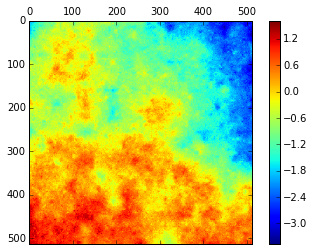

In [74]:
fig, ax = plt.subplots()
img1 = ax.matshow(data)
fig.colorbar(img1, ax=ax)

## Output to data file

Output the flm data to a suitable format for reading into MOOSE (using the grideddata object) 

In [55]:
def write2D(filename, xmax, ymax):

    xmin = 0
    ymin = 0

    num = 2**n+1

    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)

    file = open(filename, 'w')
    file.write("# Fractional Levy motion\n")
    file.write("# Generated by flm.py\n")
    file.write("# " + str(num) + " by " + str(num) + " grid\n")
    file.write("# alpha = " + str(alpha) + "\n")
    file.write("# H = " + str(H) + "\n")

    # Write out the axes data
    file.write("AXIS X\n")
    xcoords.tofile(file, sep=" ")
    file.write("\n")
    file.write("AXIS Y\n")
    ycoords.tofile(file, sep=" ")
    file.write("\n")
    file.write("DATA\n")
    data.flatten().tofile(file, sep="\n")
    file.close()
    

# Write 3D grids
def write3D(filename, xmax, ymax, zmax):

    xmin = 0
    ymin = 0
    zmin = 0

    num = 2**n+1

    xcoords = np.linspace(xmin, xmax, num)
    ycoords = np.linspace(ymin, ymax, num)
    zcoords = np.linspace(zmin, zmax, num)


    file = open(filename, 'w')
    file.write("# Fractional Levy motion\n")
    file.write("# Generated by flm.py\n")
    file.write("# " + str(num) + " by " + str(num) + " by " + str(num) +  " grid\n")
    file.write("# alpha = " + str(alpha) + "\n")
    file.write("# H = " + str(H) + "\n")

    # Write out the axes data
    file.write("AXIS X\n")
    xcoords.tofile(file, sep=" ")
    file.write("\n")
    file.write("AXIS Y\n")
    ycoords.tofile(file, sep=" ")
    file.write("\n")
    file.write("AXIS Z\n")
    zcoords.tofile(file, sep=" ")
    file.write("\n")
    file.write("DATA\n")
    data.flatten().tofile(file, sep="\n")
    file.close()

In [51]:
write2D('flm2d.dat', 100, 100)

In [56]:
write3D('flm3d.dat', 100, 100, 100)